# Gradient Boosting sample code

copy of gradient boosting [sample code](https://qiita.com/predora005/items/19aebcf3aa05946c7cf4)

## How to use XGBoost: multi class classification using iris data

XGBoost is a library using a type of decision tree algorythm, the GBDT(Gradient boosted decision tree).
This is a guide on the installation and use of said library. 
While multiple programming languages can be used, this guide will show the use with Python.

## What is GBDT
- a type of decision tree model
- a gradient boosted desicion tree

Another famous decision tree model is the random forest, which is summarized in the article below.
https://qiita.com/_tsuru/items/23fdc43ee0e54ec7c87e

## The hallmarks of GBDT
- easily achievable accuracy
- can use loss function values
- can handle numeric data

Since it has a easily achievable accuracy, it's popular in the machine learning competition Kaggle.

## [1] How to use

We will be using the iris data set from scikit-learn. The OS used is Amazon Linux2.

## [1-1] Installation

In Amazon Linux2 the installation is as follows. A guide on the installation can be found on the official website.
https://xgboost.readthedocs.io/en/latest/build.html

Comment:
type `pip3 install xgboost` into the responsible CLI.


## [1-2] Import

In [369]:
import xgboost as xgb

## [1-3] Retrieve the Iris data

There are no particularities to this process. You retrieve the Iris data and create a pandas DataFrame and a Series.


Comment:
iris data represents the input variables, meaning the features the flower has to be able to be classified. 
iris target represents the output variables, meaning what kind of flower it is, encoded as integer. 
Basically, data is the question, target is the answer

In [370]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()

iris_data = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_target = pd.Series(iris.target)

## [1-4] Create training and testing data sets

There are no particularities here either, `train_test_split` from the scikit-learn package is used to split the data into training and testing data sets.

In [371]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(iris_data, iris_target, test_size = 0.2, shuffle = True)

## [1-5] Convert the data into an XGBoost data type

XGBoost uses `DMatrix` data types. 

`DMatrix` is made up of numpy `ndarray` and pandas `DataFrame` data types, which should not pose a problem.

Details on what type of data can be used can be found in the official documentation below.
https://xgboost.readthedocs.io/en/latest/python/python_intro.html#data-interface

In [372]:
dtrain = xgb.DMatrix(train_x, label = train_y)

## [1-6] Set Parameters

Set each specific parameter. 

In [373]:
param = {'max_depth' : 2, 'eta' : 1, 'objective': 'multi:softmax', 'num_class': 3}

The meaning of each parameter is as follows:
- max_depth = how many trees will be made at a maximum
- eta = learning rate, conrols the step size at each iteration. small nummber prevents overfitting, but requires more boosting rounds
- objective = specifies the learning task and the corresponding learning objective
- num_class = the number of classes

The learning objective described here is "multi:softmax." To learn more about this, check the official documentation.
https://xgboost.readthedocs.io/en/latest/parameter.html

## [1-7] Training

`num_round` represents the number of training rounds.

In [374]:
num_round = 10
bst = xgb.train(param,dtrain, num_round)

## [1-8] Prediction

In [375]:
dtest = xgb.DMatrix(test_x)
pred = bst.predict(dtest)

## [1-9] Confirming Accuaracy

Confirm the accuary with scikit's `accuacy_score`. 

In [376]:
from sklearn.metrics import accuracy_score

score = accuracy_score(test_y, pred)
print('score:{0:.4f}'.format(score))
# 0.9667


score:0.9333


## [1-10] Plot the importance

Visualize which features have contributed in what way to the predicted result.

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

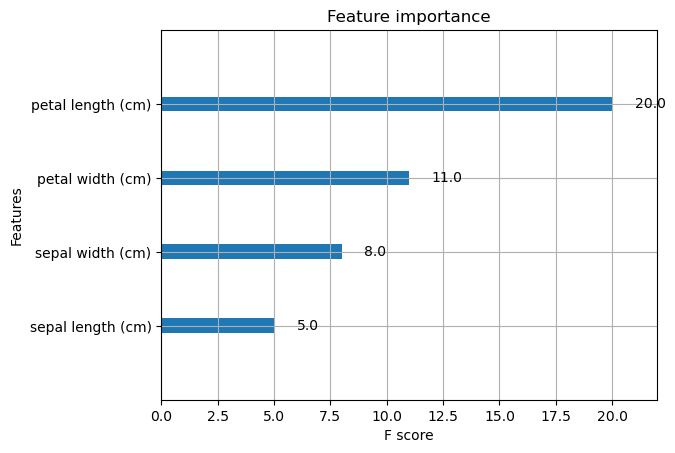

In [377]:
xgb.plot_importance(bst)

## [2] Validation and early stopping during training 

Validation and early stopping during the training proccess is easily accomplished by utilizing the validation data.

## [2-1] Splitting the data

A part of the training data is used for validation.

In [378]:
train_x, valid_x, train_y, valid_y = train_test_split(train_x, train_y, test_size=0.2, shuffle=True)

## [2-2] Creating the DMatrix

In [379]:
dtrain = xgb.DMatrix(train_x, label=train_y)
dvalid = xgb.DMatrix(valid_x, label=valid_y)

## [2-3] Add parameters

When using validation, the "eval_metric" has to be added to the parameters. "eval_metric" defines how the result is evaluated.

In [380]:
param = {'max_depth': 2, 'eta': 0.5, 'objective': 'multi:softmax', 'num_class': 3, 'eval_metric': 'mlogloss'}

## [2-4] Training

The data to be observed is defined in "evallist." The label for the validation data is 'eval,'  for the training data 'train.'

xgb.train now has the addtional parameter `early_stopping_rounds`. If the evaluation has not changed after 5 rounds, the training proccess will be cancelled an the model output. 

In [381]:
evallist = [(dvalid, 'eval'), (dtrain, 'train')];
num_round = 10000;
bst = xgb.train(param, dtrain, num_round, evals = evallist, early_stopping_rounds=5);


# [0]   eval-mlogloss:0.61103   train-mlogloss:0.60698
# Multiple eval metrics have been passed: 'train-mlogloss' will be used for early stopping.
# 
# Will train until train-mlogloss hasn't improved in 5 rounds.
# [1]   eval-mlogloss:0.36291   train-mlogloss:0.35779
# [2]   eval-mlogloss:0.22432   train-mlogloss:0.23488
# 
# 〜〜〜 途中省略 〜〜〜
# 
# Stopping. Best iteration:
# [1153]    eval-mlogloss:0.00827   train-mlogloss:0.01863


[0]	eval-mlogloss:0.58231	train-mlogloss:0.55779
[1]	eval-mlogloss:0.38533	train-mlogloss:0.34270
[2]	eval-mlogloss:0.29134	train-mlogloss:0.22646
[3]	eval-mlogloss:0.23949	train-mlogloss:0.15291
[4]	eval-mlogloss:0.21580	train-mlogloss:0.11316
[5]	eval-mlogloss:0.20794	train-mlogloss:0.08654
[6]	eval-mlogloss:0.20522	train-mlogloss:0.06772
[7]	eval-mlogloss:0.20899	train-mlogloss:0.05612
[8]	eval-mlogloss:0.20450	train-mlogloss:0.04711
[9]	eval-mlogloss:0.20215	train-mlogloss:0.04086
[10]	eval-mlogloss:0.20583	train-mlogloss:0.03579
[11]	eval-mlogloss:0.20610	train-mlogloss:0.03335
[12]	eval-mlogloss:0.20640	train-mlogloss:0.03205
[13]	eval-mlogloss:0.20698	train-mlogloss:0.03040
[14]	eval-mlogloss:0.20701	train-mlogloss:0.02948
[15]	eval-mlogloss:0.20739	train-mlogloss:0.02873
[16]	eval-mlogloss:0.20495	train-mlogloss:0.02808
[17]	eval-mlogloss:0.20257	train-mlogloss:0.02752
[18]	eval-mlogloss:0.20011	train-mlogloss:0.02668
[19]	eval-mlogloss:0.19790	train-mlogloss:0.02623
[20]	eval-

## [2-5] Confirming the result of the validation

In [382]:
#print('Best Score:{0:.4f}, Iteration:{1:d}, Ntree_limit:{2:d}'.format(bst.best_score,bst.best_iteration,bst.best_ntree_limit))
#print('Best Score:{0:.4f}, Iteratin:{1:d}, Ntree_Limit:{2:d}'.format(
#     bst.best_score, bst.best_iteration, bst.best_ntree_limit))
# Best Score:0.0186, Iteratin:1153, Ntree_Limit:1154
bst.attributes()


{'best_iteration': '2773', 'best_score': '0.01735650146899085'}

## [2-6] Prediction

Performing predictions with the model that had the best results out of the validation results.

In [383]:
dtest = xgb.DMatrix(test_x)
pred = ypred = bst.predict(dtest)
#ntree_limit = bst.best_ntree_limit

In [384]:
print(ypred)

[1. 1. 2. 0. 2. 1. 2. 1. 0. 0. 2. 0. 1. 2. 1. 1. 0. 0. 2. 1. 2. 1. 1. 2.
 1. 1. 0. 1. 2. 2.]


In [385]:
print(dtest)

## Finally

For people with experience in machine learning, using the pandas DataFrame and Series might have seemed easy.

This example was about multiple class classification, but can just as well be used for binary classification and regression. This approach can be helpful in many different situations.

In [386]:
### End of J->E, switch E->J

## Shap 

Shap is a python package that allows you to analyze and debug you models.
Shap values are used to explain individual model predictions, informing about how much a feature has influenced the prediciton.

while feature importance informs about how a feature affects the predictions in general, shap values give insight into how features influences **individual predicitons**. 

Esentially gives you an understanding of how machine learning models work. 


## SHAP 

SHAPは機械学習モデルの解析とデバッグを可能にするpythonパッケージです。
そのパッケージはモデルの予測のシャープレイ値を算出し、特徴量ごとが予測の影響が分かるようになります。


while feature importance informs about how a feature affects the predictions in general, shap values give insight into how features influences **individual predicitons**. 

Esentially gives you an understanding of how machine learning models work. 

## Shapley Values

Shapely values are a concept from cooperative game theroy to provide a way to fairly distribute the payoff of a cooperative game among players based on their contributions.
They are a method for assigning a fair share of the total payoff to each player in as cooperative game. They are based on the idea of marginal contributions: the additional value each player brings when joining a coalition.

The calculation of Shapley values involve considering all possible permutations of players joining the coalition and computing the marginal contribution of each player to each possible permutation. The Shapley value of a player is then the average of their marginal controbition over all possible permutations. 

In the context of machine learning, 

[source](https://www.youtube.com/watch?v=UJeu29wq7d0&list=PLqDyyww9y-1SJgMw92x90qPYpHgahDLIK&index=3)


In [387]:
## Shap

## Using Shap

Since shap is a package it needs to be imported alongside a few other packages that make working with it a bit more easier. 
This includes the matplotlib, pandas, numpy and seaborn package.
Since pandas is already in this scrip, it will not be imported.

In [388]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import shap

Shap also needs to be initilaized  in order to be able to be used.

In [389]:
shap.initjs()

The shap.TreeExplainer function desinged to explain prediction made by tree based models, such as the gradient tree bosting algorythm in this case.
It takes in a model a model as an argument and then provides the shapley values for each feature in each prediction made in the provided data set. 

In [390]:
explainer = shap.TreeExplainer(bst)
shap_values = explainer(test_x)

For continuous or binary predictions, the explainer returns a list of arrays that contain a shapley value for each feature in each input data, in other words, a shapley value for each feature value. 
However in this case, since we have a multi class classification, the shapley values for each input are calculated for each class. 
The sum of the values show the probaility of the input being of that specific class and the model selects the one with the hightest probabiliy as the output of the model.

In [391]:
print(np.shape(shap_values))

(30, 4, 3)


Here we show the waterfalldiagramms for all three classes of for the second row of the data.

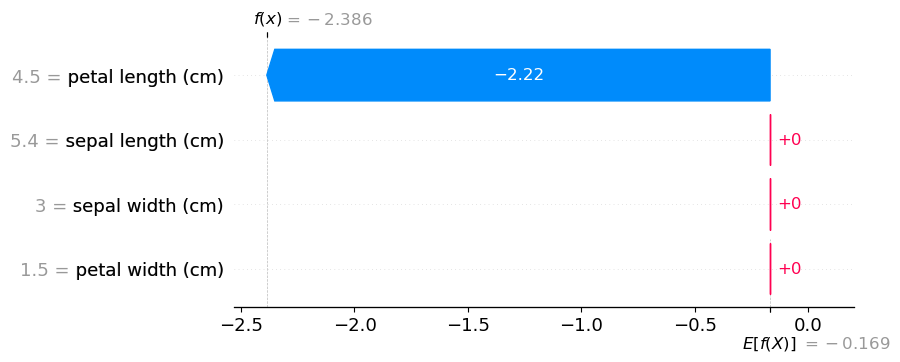

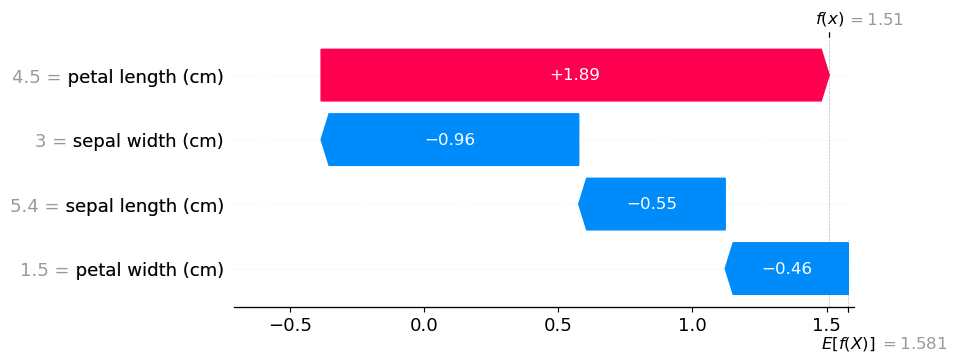

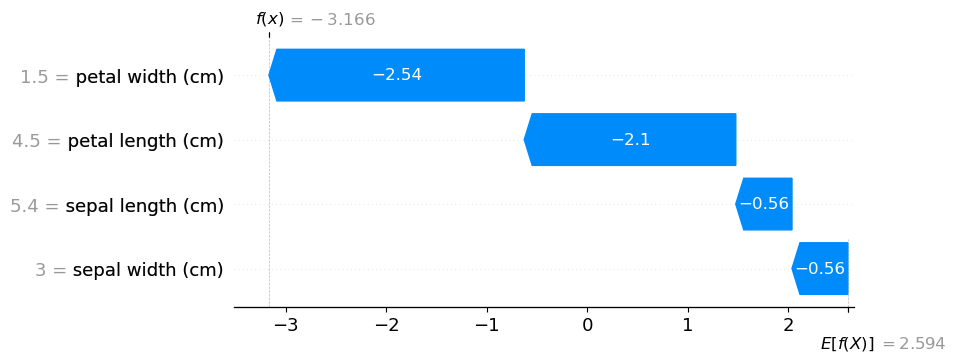

In [392]:
shap.plots.waterfall(shap_values[1,:,0])
shap.plots.waterfall(shap_values[1,:,1])
shap.plots.waterfall(shap_values[1,:,2])

In this case, this data was predicted to be of the 2nd type of class. From the charts below we can see that this matches both the predicted, and the manual classifications match. 

In [393]:
print(test_x)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
67                 5.8               2.7                4.1               1.0
84                 5.4               3.0                4.5               1.5
120                6.9               3.2                5.7               2.3
42                 4.4               3.2                1.3               0.2
131                7.9               3.8                6.4               2.0
86                 6.7               3.1                4.7               1.5
129                7.2               3.0                5.8               1.6
58                 6.6               2.9                4.6               1.3
11                 4.8               3.4                1.6               0.2
41                 4.5               2.3                1.3               0.3
102                7.1               3.0                5.9               2.1
33                 5.5               4.2                1.4     

In [394]:
print(test_y)

67     1
84     1
120    2
42     0
131    2
86     1
129    2
58     1
11     0
41     0
102    2
33     0
60     1
132    2
56     1
65     1
47     0
20     0
145    2
61     1
70     1
80     1
55     1
103    2
74     1
85     1
43     0
64     1
77     1
149    2
dtype: int32


In [395]:
print(shap_values[1]) 

.values =
array([[ 0.        , -0.5457139 , -0.559417  ],
       [ 0.        , -0.95958495, -0.5553362 ],
       [-2.2174158 ,  1.892663  , -2.1046486 ],
       [ 0.        , -0.45861876, -2.540498  ]], dtype=float32)

.base_values =
array([-0.16895765,  1.5812839 ,  2.5939486 ], dtype=float32)

.data =
array([5.4, 3. , 4.5, 1.5])


Calculating the absolute mean of the shap values. 

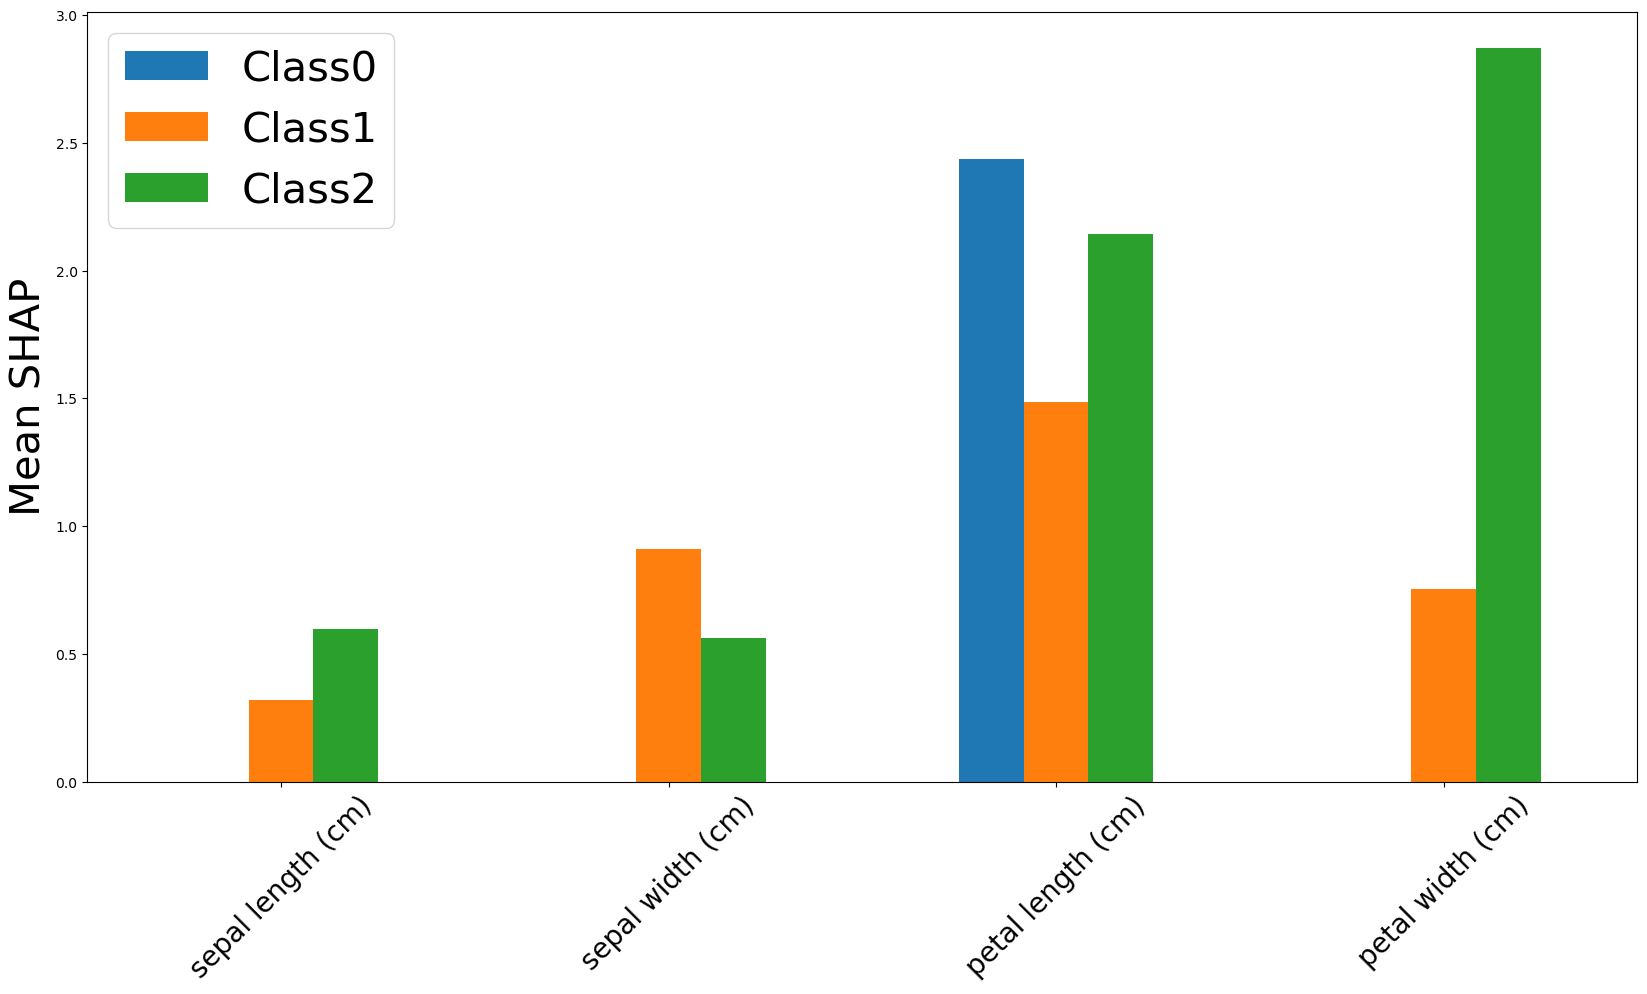

In [396]:
mean_0 = np.mean(np.abs(shap_values.values[:,:,0]),axis =0)
mean_1 = np.mean(np.abs(shap_values.values[:,:,1]),axis =0)
mean_2 = np.mean(np.abs(shap_values.values[:,:,2]),axis =0)

df= pd.DataFrame({"Class0": mean_0,"Class1": mean_1,"Class2": mean_2})

fig, ax  = plt.subplots(1,1, figsize =(20,10))
df.plot.bar(ax= ax)

ax.set_ylabel("Mean SHAP", size = 30)
ax.set_xticklabels(iris.feature_names, rotation = 45, size = 20)
ax.legend(fontsize = 30)

shap values for only the predicted class

In [397]:
print(shap_values)

.values =
array([[[ 0.        , -0.1626688 , -0.559417  ],
        [ 0.        ,  1.0546317 , -0.5553362 ],
        [-2.2174158 ,  2.0016701 , -2.3079054 ],
        [ 0.        , -0.5952622 , -3.0593073 ]],

       [[ 0.        , -0.5457139 , -0.559417  ],
        [ 0.        , -0.95958495, -0.5553362 ],
        [-2.2174158 ,  1.892663  , -2.1046486 ],
        [ 0.        , -0.45861876, -2.540498  ]],

       [[ 0.        ,  0.09458645,  0.6481397 ],
        [ 0.        , -0.95958495, -0.46632707],
        [-2.2174158 , -0.8284492 ,  1.994694  ],
        [ 0.        ,  0.21817924,  3.2155437 ]],

       [[ 0.        , -0.5457139 , -0.559417  ],
        [ 0.        , -0.95958495, -0.5553362 ],
        [ 3.152155  , -1.4542695 , -2.3079054 ],
        [ 0.        , -1.00895   , -3.0593073 ]],

       [[ 0.        ,  0.09458645,  0.6481397 ],
        [ 0.        , -0.95958495, -0.46632707],
        [-2.2174158 , -0.8284492 ,  1.994694  ],
        [ 0.        ,  0.21817924,  3.2155437 ]],



In [398]:
Tnew_shap_values =[]
for i, pre in enumerate(pred) :
    #print(pre)
    #print(i)
    #print(shap_values.values[i][:,int(pre)])
    Tnew_shap_values.append(shap_values.values[i][:,int(pre)])

#new_shap_values = shap_values
#new_shap_value.values = np.array(Tnew_shap_values)
#shap_values.values = np.array(new_shap_values)

In [399]:
import copy
new_shap_values= copy.deepcopy(shap_values)

In [400]:
print(shap_values)


.values =
array([[[ 0.        , -0.1626688 , -0.559417  ],
        [ 0.        ,  1.0546317 , -0.5553362 ],
        [-2.2174158 ,  2.0016701 , -2.3079054 ],
        [ 0.        , -0.5952622 , -3.0593073 ]],

       [[ 0.        , -0.5457139 , -0.559417  ],
        [ 0.        , -0.95958495, -0.5553362 ],
        [-2.2174158 ,  1.892663  , -2.1046486 ],
        [ 0.        , -0.45861876, -2.540498  ]],

       [[ 0.        ,  0.09458645,  0.6481397 ],
        [ 0.        , -0.95958495, -0.46632707],
        [-2.2174158 , -0.8284492 ,  1.994694  ],
        [ 0.        ,  0.21817924,  3.2155437 ]],

       [[ 0.        , -0.5457139 , -0.559417  ],
        [ 0.        , -0.95958495, -0.5553362 ],
        [ 3.152155  , -1.4542695 , -2.3079054 ],
        [ 0.        , -1.00895   , -3.0593073 ]],

       [[ 0.        ,  0.09458645,  0.6481397 ],
        [ 0.        , -0.95958495, -0.46632707],
        [-2.2174158 , -0.8284492 ,  1.994694  ],
        [ 0.        ,  0.21817924,  3.2155437 ]],



In [412]:
print(new_shap_values)

.values =
array([[-0.1626688 ,  1.0546317 ,  2.0016701 , -0.5952622 ],
       [-0.5457139 , -0.95958495,  1.892663  , -0.45861876],
       [ 0.6481397 , -0.46632707,  1.994694  ,  3.2155437 ],
       [ 0.        ,  0.        ,  3.152155  ,  0.        ],
       [ 0.6481397 , -0.46632707,  1.994694  ,  3.2155437 ],
       [ 0.35049847, -0.95958495,  2.155037  , -0.45861876],
       [ 0.6481397 , -0.5553362 ,  2.657009  ,  1.015018  ],
       [ 0.35049847, -0.95958495,  2.155037  , -0.45861876],
       [ 0.        ,  0.        ,  3.152155  ,  0.        ],
       [ 0.        ,  0.        ,  3.152155  ,  0.        ],
       [ 0.6481397 , -0.46632707,  1.994694  ,  3.2155437 ],
       [ 0.        ,  0.        ,  3.152155  ,  0.        ],
       [-0.5457139 ,  0.45281297,  1.892663  , -0.5952622 ],
       [ 0.6481397 , -0.46632707,  1.994694  ,  3.2155437 ],
       [ 0.35049847, -0.95958495,  2.1084628 ,  2.7763083 ],
       [ 0.35049847, -0.95958495,  2.155037  , -0.45861876],
       [ 0.   

In [402]:
new_shap_values.values = np.array(Tnew_shap_values)

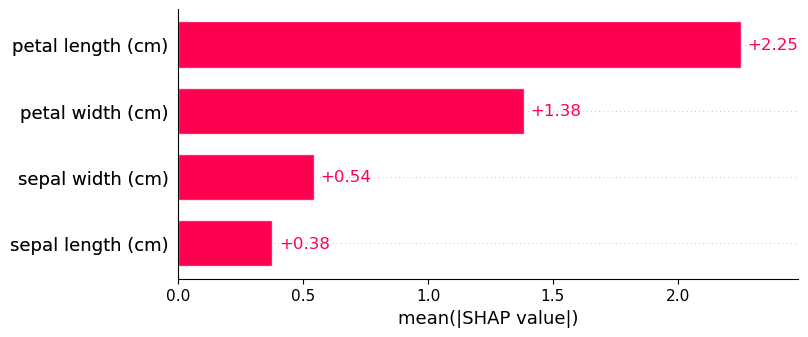

In [403]:
shap.plots.bar(new_shap_values)

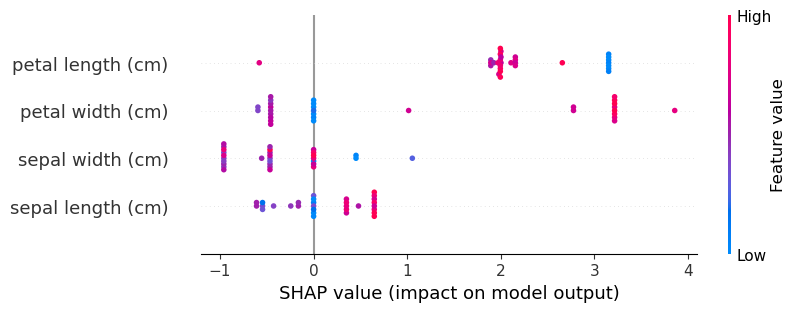

In [404]:
shap.plots.beeswarm(new_shap_values)

In [405]:
shap_feature_names = []
for f in iris.feature_names :
    shap_feature_names.append("SHARP for "+ f)

combined_column_names =iris.feature_names + shap_feature_names
print(combined_column_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'SHARP for sepal length (cm)', 'SHARP for sepal width (cm)', 'SHARP for petal length (cm)', 'SHARP for petal width (cm)']


In [406]:
#predicted_shap_df = pd.DataFrame(new_shap_values.values, columns=iris.feature_names)
predicted_shap_df = pd.DataFrame(new_shap_values.values, columns=shap_feature_names)
commbined_np_list = np.concatenate((test_x,predicted_shap_df ), axis=1)
combined_df = pd.DataFrame(commbined_np_list, columns=combined_column_names)
print(combined_df)

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                 5.8               2.7                4.1               1.0   
1                 5.4               3.0                4.5               1.5   
2                 6.9               3.2                5.7               2.3   
3                 4.4               3.2                1.3               0.2   
4                 7.9               3.8                6.4               2.0   
5                 6.7               3.1                4.7               1.5   
6                 7.2               3.0                5.8               1.6   
7                 6.6               2.9                4.6               1.3   
8                 4.8               3.4                1.6               0.2   
9                 4.5               2.3                1.3               0.3   
10                7.1               3.0                5.9               2.1   
11                5.5               4.2 

In [407]:
combined_df.to_csv('predicted_shap_values_combined.csv', index=False)

In [408]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [414]:
full_result_data = []
for i in range(len(shap_values)) :
    data_1 = shap_values.values[i][:,0]
    data_2 = shap_values.values[i][:,1]
    data_3 = shap_values.values[i][:,2]
    args = (data_1, data_2, data_3)
    return_data = np.concatenate(args)
    full_result_data.append(return_data)


In [421]:
full_shap_feature_names = []
for i in range(3):
    for f in iris.feature_names :
        full_shap_feature_names.append("SHARP for "+ f + " Class" + str(i+1))

full_column_names =iris.feature_names + full_shap_feature_names
print(full_column_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'SHARP for sepal length (cm) Class1', 'SHARP for sepal width (cm) Class1', 'SHARP for petal length (cm) Class1', 'SHARP for petal width (cm) Class1', 'SHARP for sepal length (cm) Class2', 'SHARP for sepal width (cm) Class2', 'SHARP for petal length (cm) Class2', 'SHARP for petal width (cm) Class2', 'SHARP for sepal length (cm) Class3', 'SHARP for sepal width (cm) Class3', 'SHARP for petal length (cm) Class3', 'SHARP for petal width (cm) Class3']


In [422]:
full_np_list = np.concatenate((test_x,full_result_data ), axis=1)
full_df = pd.DataFrame(full_np_list, columns=full_column_names)
print(full_df)

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                 5.8               2.7                4.1               1.0   
1                 5.4               3.0                4.5               1.5   
2                 6.9               3.2                5.7               2.3   
3                 4.4               3.2                1.3               0.2   
4                 7.9               3.8                6.4               2.0   
5                 6.7               3.1                4.7               1.5   
6                 7.2               3.0                5.8               1.6   
7                 6.6               2.9                4.6               1.3   
8                 4.8               3.4                1.6               0.2   
9                 4.5               2.3                1.3               0.3   
10                7.1               3.0                5.9               2.1   
11                5.5               4.2 

In [423]:
full_df.to_csv('full_shap_values.csv', index=False)